# Train a ANN that identifies points inside a circle (generate the data yourself). Experiment with the number of neurons in the intermediate layer

In [53]:

import tensorflow as tf # importamos librerias
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [54]:
#DATOS CIRCULO


In [69]:
#Para generar los datos del circulo usamos a^2+b^2<1. 
#Si se cumple con la propiedad, entonces la variable de salida y es 1, que indica que el punto esta dentro del circulo
lim = 1.5
n = 1000
a = np.random.uniform(-lim,lim,n)
b = np.random.uniform(-lim,lim,n)

y = a*a + b*b <= 1
y = y.astype(int)
X=np.asarray([[a[i],b[i]] for i in range(0,n)])
Y=np.asarray([[yi] for yi in y])

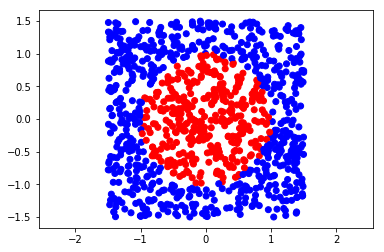

In [70]:
#Visualizamos como los datos efectivamente estan sepadados por dentro y fuera del circulo
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.axis('equal')
plt.show()

In [110]:
# red neuronal
input_size=2
hl1=32
output_size=1
x=tf.placeholder(tf.float32,shape=[None,input_size])
y_=tf.placeholder(tf.float32,shape=[None,output_size])
W_layer1 = tf.Variable(tf.random_uniform([input_size,hl1], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([hl1]), name="b_layer1")
W_layer2 = tf.Variable(tf.random_uniform([hl1,output_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_size]), name="b_layer2")

In [111]:
hidden_1=tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
y= tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2)
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [112]:
# iniciar la sesión
init = tf.global_variables_initializer()
sess = tf.Session()

In [113]:
epochs=6000
sess.run(init)
for i in range(epochs):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [108]:
correctPred = tf.equal(tf.round(y),y_) 
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y}))

0.996


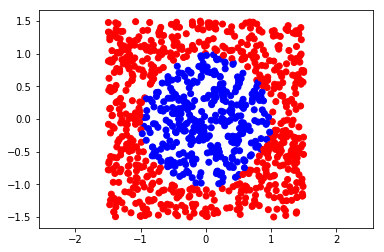

In [107]:
# graficar
predict = sess.run(y,feed_dict={x:X})
plt.scatter(a, b, c=['red' if i < 0.5 else 'blue' for i in predict])
plt.ylim([-1.1,1.1])
plt.xlim([-1.3,1.3])

plt.axis('equal')
plt.show()
